# Import thư viện

In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Kết nối đến cơ sở dữ liệu DWH

In [295]:
from sqlalchemy import create_engine

username = 'fuctre'
password = '123456'
host = 'localhost'
port = '1433'
database = 'DWH'

try:
    engine = create_engine(
        f"mssql+pyodbc://{username}:{password}@{host}:{port}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    )
    print("Kết nối thành công đến cơ sở dữ liệu!")
except Exception as e:
    print("Kết nối thất bại! Lỗi chi tiết:")
    print(e)


Kết nối thành công đến cơ sở dữ liệu!


# Truy vấn dữ liệu từ bảng

In [296]:
query_bond = 'SELECT * FROM Bond_Sales'
query_deposit = 'SELECT * FROM Deposits'
query_transfer = 'SELECT * FROM Transfers'
query_loan = 'SELECT * FROM Loans'
query_exp = 'SELECT * FROM Expenses'
query_withdrawal = 'SELECT * FROM Withdrawals'

# Trích xuất dữ liệu vào DataFrame

In [297]:
bonds = pd.read_sql(query_bond, con = engine)
deposits = pd.read_sql(query_deposit, con = engine)
transfers = pd.read_sql(query_transfer, con = engine)
loans = pd.read_sql(query_loan, con = engine)
exps = pd.read_sql(query_exp, con = engine)
withdrawals = pd.read_sql(query_withdrawal, con = engine)

## Bond (Trái Phiếu):

In [298]:
bonds.head()

,Bond_Sale_Date,Bond_ID,Sale_Amount,Bond_Maturity_Date,Bond_Type,Interest_Rate
0,2024-08-15 23:16:22.640,BOND_143,27124.99,2024-11-15 23:16:22.683,Corporate Bond,4.71
1,2023-11-01 23:16:22.640,BOND_135,23173.93,2024-09-10 23:16:22.683,Government Bond,1.01
2,2024-01-29 23:16:22.640,BOND_79,41488.41,2025-06-06 23:16:22.683,Government Bond,3.32
3,2024-06-19 23:16:22.640,BOND_92,17066.59,2024-07-20 23:16:22.683,Corporate Bond,3.27
4,2024-04-25 23:16:22.640,BOND_60,22618.45,2024-08-13 23:16:22.683,Corporate Bond,4.66


### Thông tin cơ bản 

In [299]:
bonds['Bond_Sale_Date'] = pd.to_datetime(bonds['Bond_Sale_Date'])
bonds['Bond_Maturity_Date'] = pd.to_datetime(bonds['Bond_Maturity_Date'])
bonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Bond_Sale_Date      10000 non-null  datetime64[ns]
 1   Bond_ID             10000 non-null  object        
 2   Sale_Amount         10000 non-null  float64       
 3   Bond_Maturity_Date  10000 non-null  datetime64[ns]
 4   Bond_Type           10000 non-null  object        
 5   Interest_Rate       10000 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 468.9+ KB


### Thống kê tóm tắt

In [300]:
print("Summary Statistics:")
print(bonds.describe(include='all'))
print("\n")


Summary Statistics:
                       Bond_Sale_Date   Bond_ID   Sale_Amount  \
count                           10000     10000  10000.000000   
unique                            NaN       200           NaN   
top                               NaN  BOND_127           NaN   
freq                              NaN        66           NaN   
mean    2024-04-05 21:25:38.493264640       NaN  29980.327757   
min        2023-10-05 23:16:22.640000       NaN  10001.750000   
25%     2024-01-05 23:16:22.647000064       NaN  19997.740000   
50%        2024-04-06 23:16:22.640000       NaN  30147.130000   
75%     2024-07-06 23:16:22.653999872       NaN  39872.527500   
max        2024-10-04 23:16:22.663000       NaN  49995.890000   
std                               NaN       NaN  11567.019478   

                   Bond_Maturity_Date       Bond_Type  Interest_Rate  
count                           10000           10000   10000.000000  
unique                            NaN               2    

### Kiểm tra giá trị thiếu

In [301]:
print("Missing Values:")
print(bonds.isnull().sum())
print("\n")


Missing Values:
Bond_Sale_Date        0
Bond_ID               0
Sale_Amount           0
Bond_Maturity_Date    0
Bond_Type             0
Interest_Rate         0
dtype: int64




###  Các loại trái phiếu duy nhất

In [302]:
print("Unique Bond Types:")
print(bonds['Bond_Type'].value_counts())
print("\n")


Unique Bond Types:
Bond_Type
Corporate Bond     5019
Government Bond    4981
Name: count, dtype: int64




### Phân phối số tiền bán (Sale_Amount)

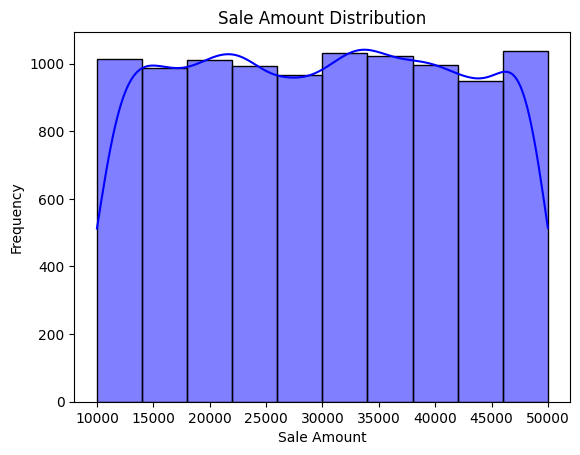

In [303]:
sns.histplot(bonds['Sale_Amount'], kde=True, bins=10, color='blue')
plt.title("Sale Amount Distribution")
plt.xlabel("Sale Amount")
plt.ylabel("Frequency")
plt.show()



Biểu đồ cho thấy phân phối đồng đều của giá trị Sale_Amount từ 10,000 đến 50,000, không có giá trị bất thường. Đường KDE cho thấy mật độ ổn định và giảm nhẹ ở hai đầu.

### Phân phối lãi suất (Interest_Rate)


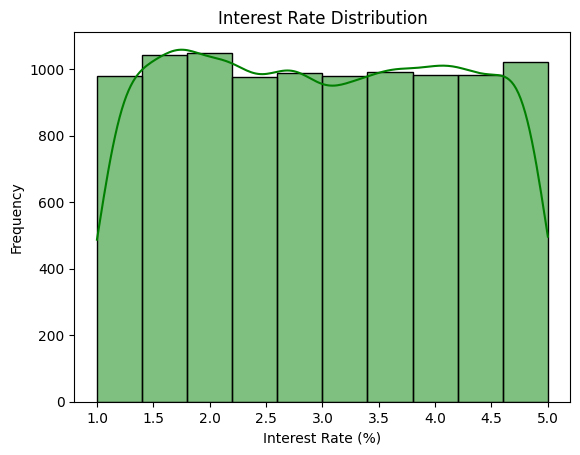

In [304]:
sns.histplot(bonds['Interest_Rate'], kde=True, bins=10, color='green')
plt.title("Interest Rate Distribution")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()


Biểu đồ thể hiện phân phối lãi suất (Interest Rate) gần như đồng đều từ 1% đến 5%. Tần suất giữa các khoảng hầu hết ổn định, không có bất thường đáng chú ý. Đường KDE cho thấy mật độ giảm ở hai đầu.

### Mối quan hệ giữa lãi suất và số tiền bán

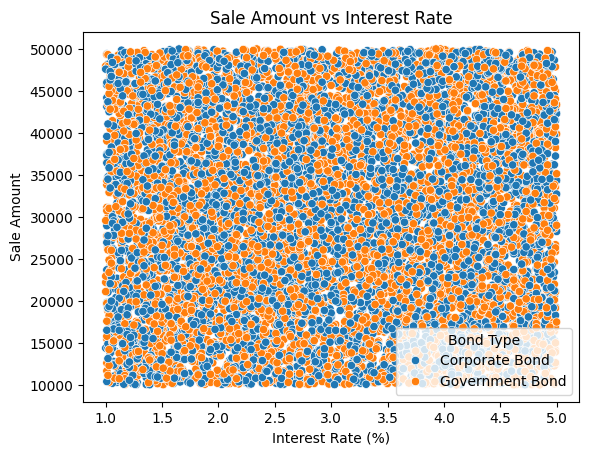

In [305]:
sns.scatterplot(data=bonds, x='Interest_Rate', y='Sale_Amount', hue='Bond_Type')   # hue (màu sắc đại diện)
plt.title("Sale Amount vs Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Sale Amount")
plt.legend(title='Bond Type')
plt.show()



Biểu đồ tán xạ cho thấy không có mối quan hệ rõ ràng giữa lãi suất (Interest Rate) và số tiền bán (Sale Amount). Các điểm dữ liệu được phân bố đều trong toàn bộ phạm vi lãi suất (1% - 5%) và số tiền bán (10,000 - 50,000). Cả hai loại trái phiếu (Corporate Bond và Government Bond) xuất hiện đồng đều, không có sự khác biệt đáng kể về phân bố giữa chúng.

### Phân phối các loại trái phiếu



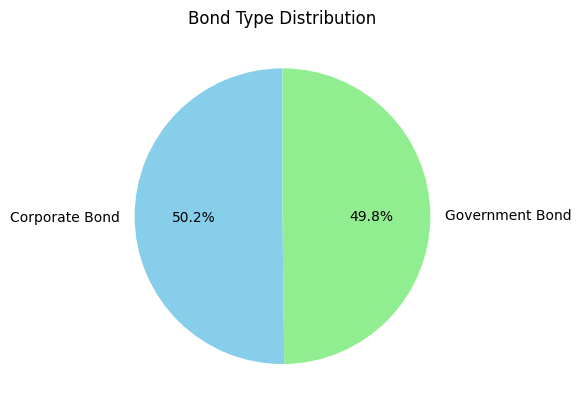

In [306]:
bonds['Bond_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title("Bond Type Distribution")
plt.ylabel("") 
plt.show()


### Số tiền bán theo loại trái phiếu

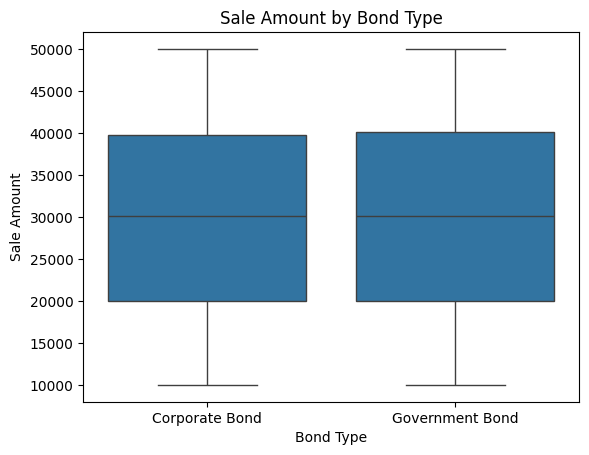

In [307]:
sns.boxplot(data=bonds, x='Bond_Type', y='Sale_Amount')
plt.title("Sale Amount by Bond Type")
plt.xlabel("Bond Type")
plt.ylabel("Sale Amount")
plt.show()


Biểu đồ cho thấy Sale Amount của Corporate Bond và Government Bond có phân phối tương tự, trung bình khoảng 30,000, không có khác biệt đáng kể. Sale Amount dao động từ 10,000 đến 50,000 cho cả hai loại.

## Deposit (Tiền gửi):

In [308]:
deposits.head()

,Deposit_ID,Customer_ID,Deposit_Date,Deposit_Amount,Account_Type,Term,Interest_Rate,Interest_Outflow
0,1,CUST_6853,2024-05-16 23:15:33.930,60328.01,Fixed,6,0.040,1206.5602
1,2,CUST_15427,2023-11-06 23:15:33.930,76730.79,Current,0,0.003,0.0000
2,3,CUST_32744,2024-01-23 23:15:33.930,69362.41,Fixed,1,0.020,115.6040
3,4,CUST_33283,2024-07-14 23:15:33.930,69722.39,Fixed,6,0.040,1394.4478
4,5,CUST_47413,2023-11-13 23:15:33.930,46119.61,Fixed,1,0.020,76.8660


### Thông tin cơ bản 

In [309]:
deposits['Deposit_Date'] = pd.to_datetime(deposits['Deposit_Date'])
deposits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Deposit_ID        70000 non-null  int64         
 1   Customer_ID       70000 non-null  object        
 2   Deposit_Date      70000 non-null  datetime64[ns]
 3   Deposit_Amount    70000 non-null  float64       
 4   Account_Type      70000 non-null  object        
 5   Term              70000 non-null  int64         
 6   Interest_Rate     70000 non-null  float64       
 7   Interest_Outflow  70000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 4.3+ MB


### Thống kê tóm tắt

In [310]:
print(deposits.describe(include='all'))

          Deposit_ID Customer_ID                   Deposit_Date  \
count   70000.000000       70000                          70000   
unique           NaN       37605                            NaN   
top              NaN  CUST_31727                            NaN   
freq             NaN           9                            NaN   
mean    35000.500000         NaN  2024-04-05 01:42:26.812473088   
min         1.000000         NaN     2023-10-05 23:15:33.930000   
25%     17500.750000         NaN  2024-01-04 23:15:33.952999936   
50%     35000.500000         NaN  2024-04-04 23:15:34.070000128   
75%     52500.250000         NaN  2024-07-04 23:15:33.987750144   
max     70000.000000         NaN     2024-10-04 23:15:34.083000   
std     20207.403759         NaN                            NaN   

        Deposit_Amount Account_Type          Term  Interest_Rate  \
count     70000.000000        70000  70000.000000   70000.000000   
unique             NaN            2           NaN          

### Kiểm tra giá trị thiếu

In [311]:
print(deposits.isnull().sum())

Deposit_ID          0
Customer_ID         0
Deposit_Date        0
Deposit_Amount      0
Account_Type        0
Term                0
Interest_Rate       0
Interest_Outflow    0
dtype: int64


### Số lượng loại tài khoản (Account_Type)

In [312]:
print(deposits['Account_Type'].value_counts())

Account_Type
Fixed      35244
Current    34756
Name: count, dtype: int64


### Phân phối các biến


<Axes: xlabel='Deposit_Amount', ylabel='Count'>

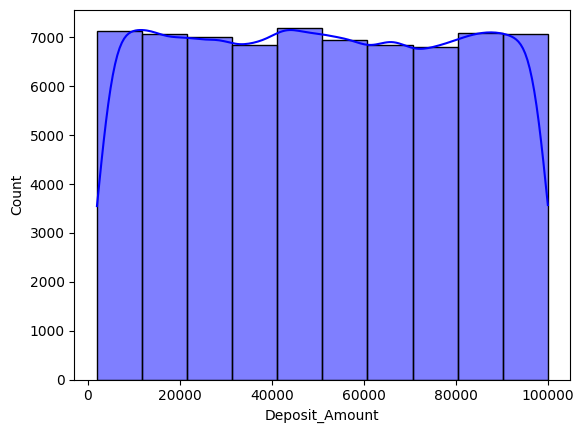

In [313]:
# Deposit_Amount
# (phân phối số tiền gửi)
sns.histplot(deposits['Deposit_Amount'], kde=True, bins=10, color='blue')

Dữ liệu số tiền gửi phân bố đều, không bị lệch về một khoảng giá trị cụ thể. Điều này gợi ý rằng các khoản tiền gửi trong dataset có tính đa dạng và không tập trung ở một mức cụ thể nào.

<Axes: xlabel='Interest_Rate', ylabel='Count'>

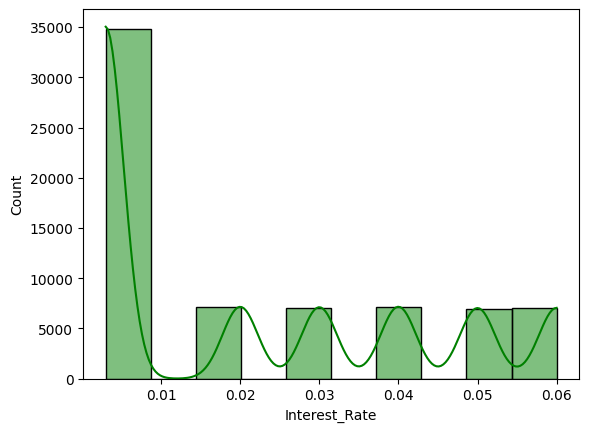

In [314]:
# Interest_Rate
# (phân phối lãi suất)
sns.histplot(deposits['Interest_Rate'], kde=True, bins=10, color='green')

Dữ liệu chủ yếu tập trung ở lãi suất thấp (< 1%), có thể phản ánh thực tế rằng các khoản tiền gửi chủ yếu được áp dụng lãi suất thấp, hoặc một chính sách lãi suất ưu tiên được sử dụng.

<Axes: xlabel='Term', ylabel='Count'>

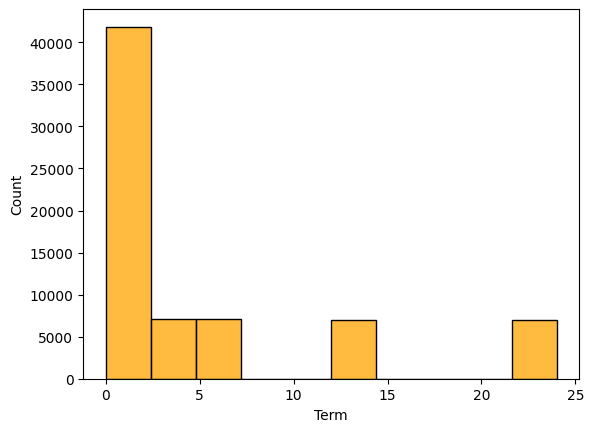

In [315]:
# Term 
# (thời hạn gửi):
sns.histplot(deposits['Term'], kde=False, bins=10, color='orange')

Dữ liệu cho thấy đa số khoản tiền gửi có thời hạn ngắn, có thể phản ánh nhu cầu thanh khoản cao của khách hàng hoặc chính sách tiền gửi ưu tiên thời hạn ngắn.

### Mối quan hệ giữa số tiền gửi và dòng tiền lãi 

<Axes: xlabel='Deposit_Amount', ylabel='Interest_Outflow'>

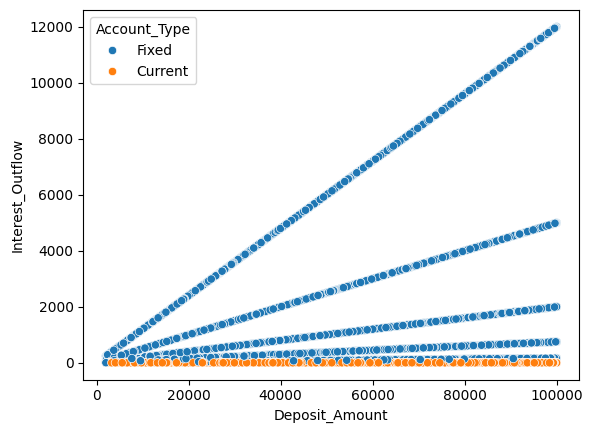

In [316]:
sns.scatterplot(data=deposits, x='Deposit_Amount', y='Interest_Outflow', hue='Account_Type')

- Dòng tiền lãi (Interest Outflow) tăng tuyến tính theo số tiền gửi (Deposit Amount)
- Tài khoản cố định (fixed) cho thấy lãi suất cao hơn hẳn so với tài khoản vãng lai (curent)

### Phân phối loại tài khoản

<Axes: ylabel='count'>

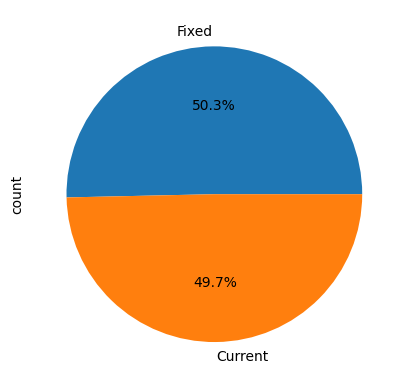

In [317]:
deposits['Account_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Boxplot (biểu đồ hộp)

<Axes: xlabel='Account_Type', ylabel='Deposit_Amount'>

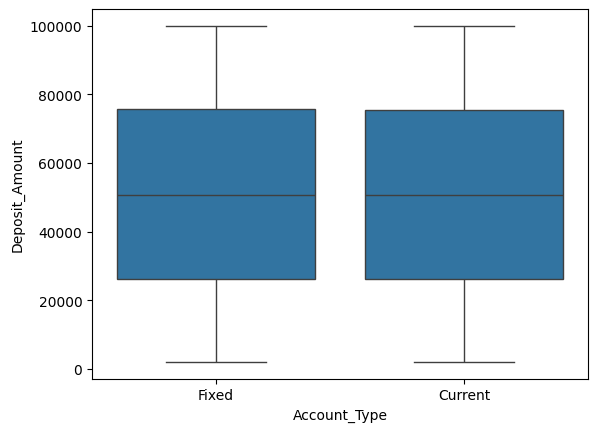

In [318]:
# So sánh số tiền gửi giữa các loại tài khoản.
sns.boxplot(data=deposits, x='Account_Type', y='Deposit_Amount')

Cả hai loại tài khoản có trung vị (đường ngang giữa hộp) tương tự nhau, khoảng 50,000. Số tiền gửi dao động từ 0 đến 100,000 ở cả hai loại tài khoản.

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\499413808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=deposits, x='Term', y='Interest_Outflow', palette='viridis')


<Axes: xlabel='Term', ylabel='Interest_Outflow'>

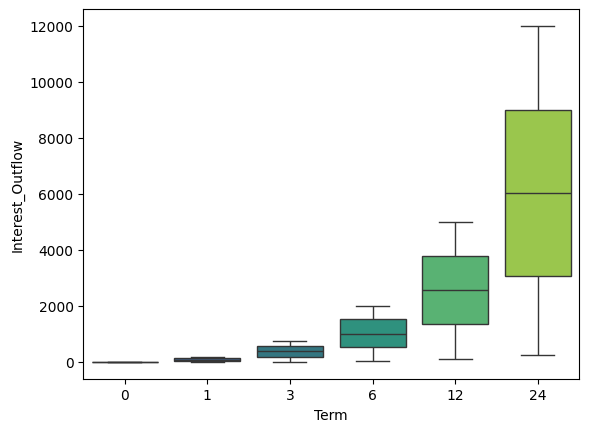

In [319]:
# Quan sát dòng tiền lãi theo thời hạn gửi.
sns.boxplot(data=deposits, x='Term', y='Interest_Outflow', palette='viridis')

Khi thời hạn gửi (Term) tăng từ 0 đến 24 tháng, Interest Outflow tăng đáng kể.

## Interbank Transfer (Chuyển khoản liên ngân hàng):

In [320]:
transfers.head()

,Transfer_Date,Transaction_ID,Counterparty_Bank,Transfer_Amount,Transfer_Currency,Transfer_Type,Transfer_Purpose
0,2024-06-02 23:16:44.530,TXN_525,Bank A,40189.92,EUR,Inbound,Liquidity Management
1,2024-06-10 23:16:44.530,TXN_486,Bank A,42353.85,EUR,Inbound,Liquidity Management
2,2024-08-28 23:16:44.530,TXN_556,Bank B,36197.97,EUR,Inbound,Settlement
3,2024-01-15 23:16:44.530,TXN_846,Bank C,41887.55,EUR,Outbound,Liquidity Management
4,2024-04-12 23:16:44.530,TXN_838,Bank B,28152.32,GBP,Outbound,Settlement


### Thông tin cơ bản

In [321]:
transfers['Transfer_Date'] = pd.to_datetime(transfers['Transfer_Date'])
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transfer_Date      2000 non-null   datetime64[ns]
 1   Transaction_ID     2000 non-null   object        
 2   Counterparty_Bank  2000 non-null   object        
 3   Transfer_Amount    2000 non-null   float64       
 4   Transfer_Currency  2000 non-null   object        
 5   Transfer_Type      2000 non-null   object        
 6   Transfer_Purpose   2000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 109.5+ KB


### Thống kê tóm tắt

In [322]:
print(transfers.describe(include='all'))

                        Transfer_Date Transaction_ID Counterparty_Bank  \
count                            2000           2000              2000   
unique                            NaN            864                 3   
top                               NaN         TXN_35            Bank A   
freq                              NaN              8               701   
mean    2024-04-06 17:45:32.532184832            NaN               NaN   
min        2023-10-05 23:16:44.530000            NaN               NaN   
25%     2024-01-08 17:16:44.530749952            NaN               NaN   
50%     2024-04-09 23:16:44.532999936            NaN               NaN   
75%     2024-07-05 23:16:44.532999936            NaN               NaN   
max        2024-10-04 23:16:44.533000            NaN               NaN   
std                               NaN            NaN               NaN   

        Transfer_Amount Transfer_Currency Transfer_Type      Transfer_Purpose  
count       2000.000000        

### Kiểm tra giá trị thiếu

In [323]:
print(transfers.isnull().sum())

Transfer_Date        0
Transaction_ID       0
Counterparty_Bank    0
Transfer_Amount      0
Transfer_Currency    0
Transfer_Type        0
Transfer_Purpose     0
dtype: int64


### Số lượng loại chuyển khoản

In [324]:
print(transfers['Transfer_Type'].value_counts())

Transfer_Type
Outbound    1015
Inbound      985
Name: count, dtype: int64


### Số lượng loại tiền tệ

In [325]:
print(transfers['Transfer_Currency'].value_counts())

Transfer_Currency
GBP    694
USD    661
EUR    645
Name: count, dtype: int64


### Phân phối dữ liệu

<Axes: xlabel='Transfer_Amount', ylabel='Count'>

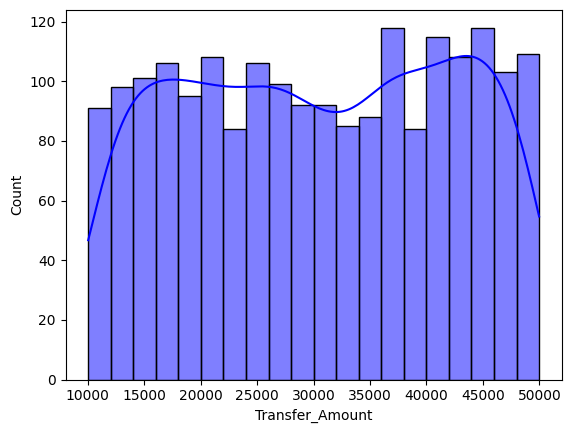

In [326]:
# Phân phối số tiền chuyển khoản (Transfer_Amount)
sns.histplot(transfers['Transfer_Amount'], kde=True, bins=20, color='blue')

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\144535811.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transfer_Type', data=transfers, palette='Set2')


<Axes: xlabel='Transfer_Type', ylabel='count'>

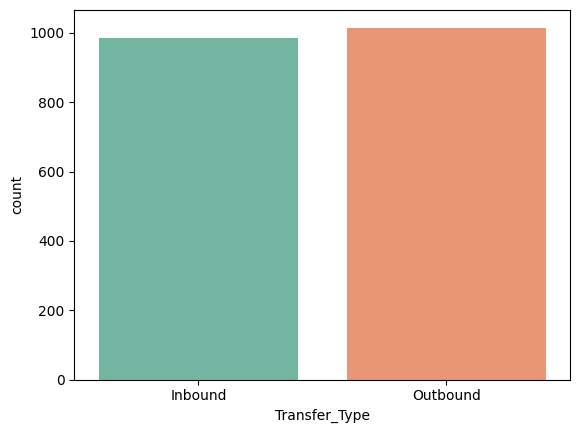

In [327]:
# Phân phối loại chuyển khoản (Transfer_Type)
sns.countplot(x='Transfer_Type', data=transfers, palette='Set2')

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\1695791884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transfer_Currency', data=transfers, palette='Set3')


<Axes: xlabel='Transfer_Currency', ylabel='count'>

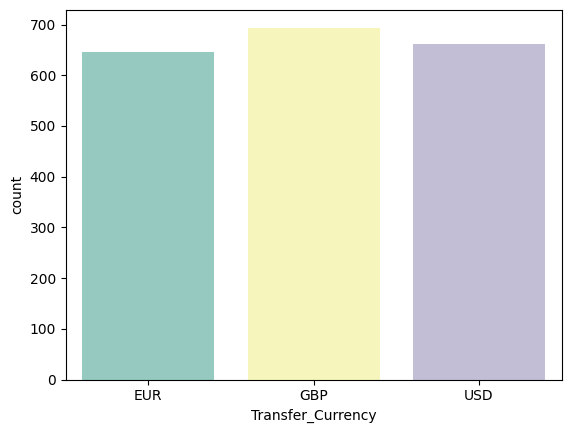

In [328]:
# Phân phối tiền tệ (Transfer_Currency)
sns.countplot(x='Transfer_Currency', data=transfers, palette='Set3')

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\676108951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transfer_Purpose', data=transfers, palette='Set1')


<Axes: xlabel='Transfer_Purpose', ylabel='count'>

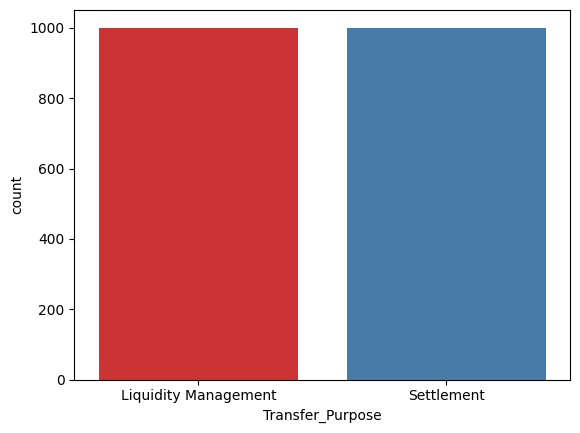

In [329]:
# Phân phối mục đích chuyển khoản (Transfer_Purpose)
sns.countplot(x='Transfer_Purpose', data=transfers, palette='Set1')

### Biểu đồ

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\134612118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transfer_Type', y='Transfer_Amount', data=transfers, palette='Set2')


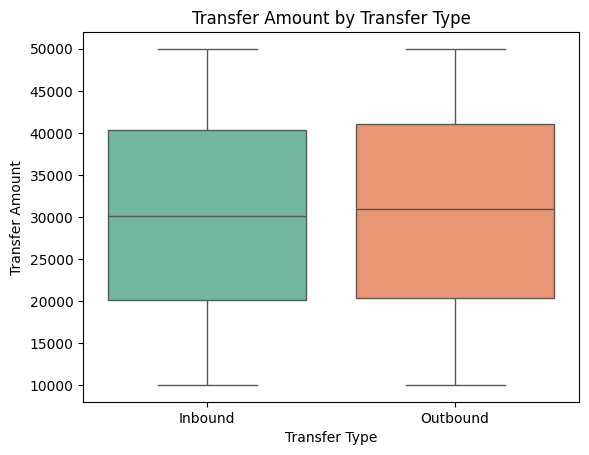

In [330]:
# Boxplot Số tiền chuyển theo Loại giao dịch
sns.boxplot(x='Transfer_Type', y='Transfer_Amount', data=transfers, palette='Set2')
plt.title("Transfer Amount by Transfer Type")
plt.xlabel("Transfer Type")
plt.ylabel("Transfer Amount")
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\3855042005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transfer_Currency', y='Transfer_Amount', data=transfers, palette='Set3')


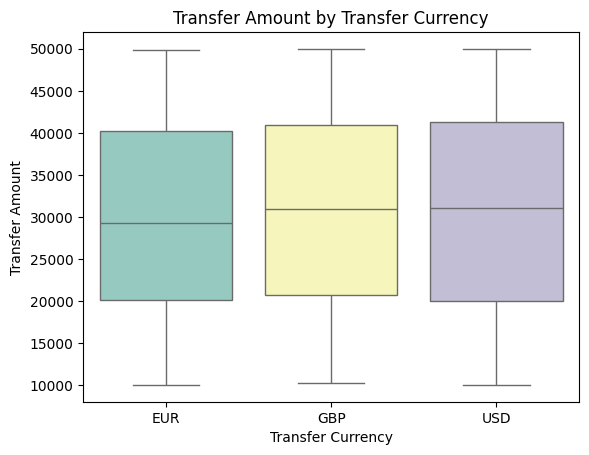

In [331]:
# Boxplot Số tiền chuyển theo Loại tiền tệ
sns.boxplot(x='Transfer_Currency', y='Transfer_Amount', data=transfers, palette='Set3')
plt.title("Transfer Amount by Transfer Currency")
plt.xlabel("Transfer Currency")
plt.ylabel("Transfer Amount")
plt.show()


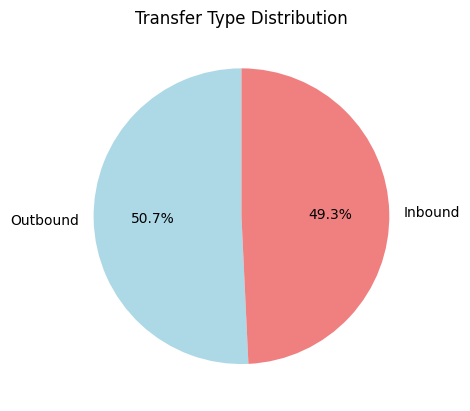

In [332]:
# Biểu đồ tròn phân phối Loại giao dịch
transfers['Transfer_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title("Transfer Type Distribution")
plt.ylabel("")
plt.show()

## Loans (Khoản vay)

In [333]:
loans.head()

,Loan_ID,Customer_ID,Loan_Date,Loan_Amount,Loan_Type,Loan_Term,Interest_Rate,Interest_Inflow
0,1,CUST_49642,2024-08-11 23:15:53.443,21654.30,Auto,24,0.08,3464.6880
1,2,CUST_43883,2024-04-04 23:15:53.443,25862.25,Personal,36,0.08,6206.9400
2,3,CUST_7937,2023-11-23 23:15:53.443,46793.21,Auto,48,0.10,18717.2840
3,4,CUST_30035,2024-01-25 23:15:53.443,24625.98,Personal,12,0.06,1477.5588
4,5,CUST_23127,2023-11-06 23:15:53.443,11231.78,Personal,24,0.07,1572.4492


### Thông tin cơ bản

In [334]:
loans['Loan_Date'] = pd.to_datetime(loans['Loan_Date']).dt.date
loans['Loan_Date'] = pd.to_datetime(loans['Loan_Date'])
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transfer_Date      2000 non-null   datetime64[ns]
 1   Transaction_ID     2000 non-null   object        
 2   Counterparty_Bank  2000 non-null   object        
 3   Transfer_Amount    2000 non-null   float64       
 4   Transfer_Currency  2000 non-null   object        
 5   Transfer_Type      2000 non-null   object        
 6   Transfer_Purpose   2000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 109.5+ KB


### Thống kê tóm tắt

In [335]:
print(loans.describe(include='all'))
print("\n")

             Loan_ID Customer_ID                   Loan_Date   Loan_Amount  \
count   25000.000000       25000                       25000  25000.000000   
unique           NaN       19705                         NaN           NaN   
top              NaN   CUST_2885                         NaN           NaN   
freq             NaN           6                         NaN           NaN   
mean    12500.500000         NaN  2024-04-05 02:14:57.408000  27431.738627   
min         1.000000         NaN         2023-10-05 00:00:00   5002.540000   
25%      6250.750000         NaN         2024-01-05 00:00:00  16159.290000   
50%     12500.500000         NaN         2024-04-06 00:00:00  27417.750000   
75%     18750.250000         NaN         2024-07-05 00:00:00  38709.687500   
max     25000.000000         NaN         2024-10-04 00:00:00  49992.690000   
std      7217.022701         NaN                         NaN  13006.497787   

       Loan_Type     Loan_Term  Interest_Rate  Interest_Inflow 

### Kiểm tra giá trị thiếu

In [336]:
print(loans.isnull().sum())
print("\n")

Loan_ID            0
Customer_ID        0
Loan_Date          0
Loan_Amount        0
Loan_Type          0
Loan_Term          0
Interest_Rate      0
Interest_Inflow    0
dtype: int64




### Kiểm tra giá trị

In [337]:
# Số lượng mỗi loại khoản vay (Loan_Type) xuất hiện trong dataset.
print("Unique Loan Types:")
print(loans['Loan_Type'].value_counts())

Unique Loan Types:
Loan_Type
Personal    8416
Home        8336
Auto        8248
Name: count, dtype: int64


In [338]:
# Hiển thị các kỳ hạn vay (Loan_Term) duy nhất và số lần xuất hiện của chúng.
print("Unique Loan Terms:")
print(loans['Loan_Term'].value_counts())
print("\n")

Unique Loan Terms:
Loan_Term
24    6344
36    6298
12    6235
48    6123
Name: count, dtype: int64




### Phân tích phân phối dữ liệu

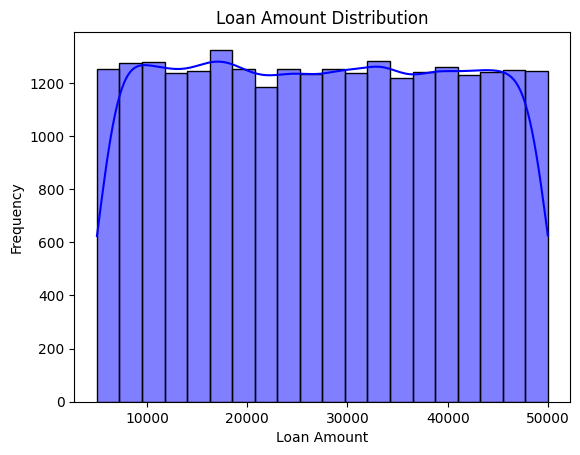

In [339]:
# Biểu đồ histogram để hiển thị phân phối của cột Loan_Amount (số tiền vay).
sns.histplot(loans['Loan_Amount'], kde=True, bins=20, color='blue')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

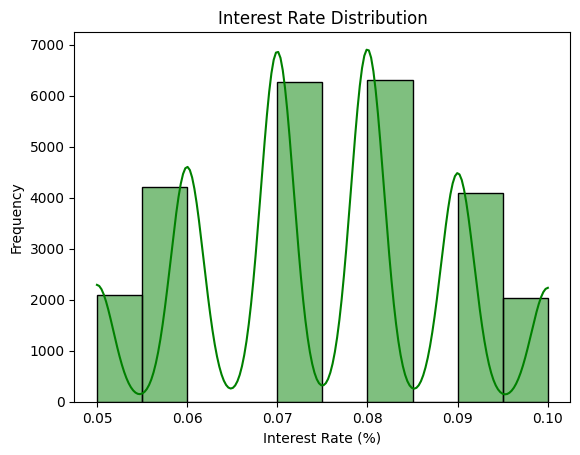

In [340]:
# Biểu đồ histogram để hiển thị phân phối của cột Interest_Rate (lãi suất).
sns.histplot(loans['Interest_Rate'], kde=True, bins=10, color='green')
plt.title("Interest Rate Distribution")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()

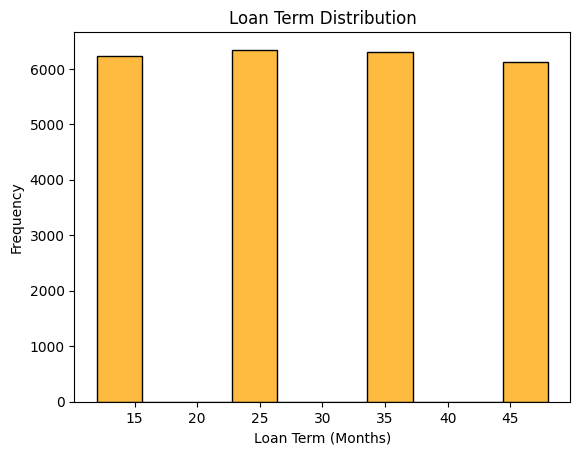

In [341]:
# Phân phối kỳ hạn vay (Loan_Term) theo các khoảng thời gian (bằng histogram).
sns.histplot(loans['Loan_Term'], kde=False, bins=10, color='orange')
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Frequency")
plt.show()

### Mối quan hệ giữa các biến

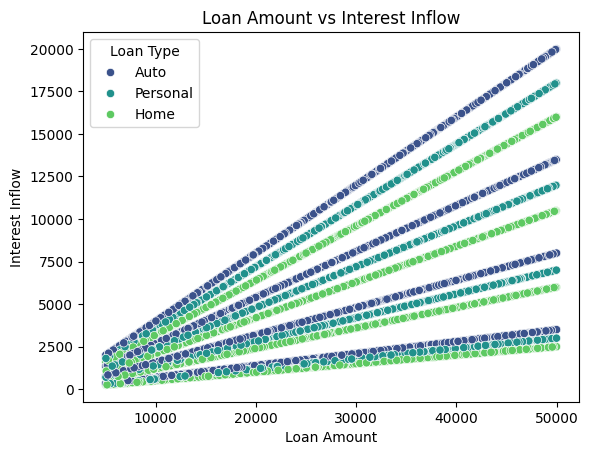

In [342]:
# Biểu diễn mối quan hệ giữa Loan_Amount (số tiền vay) và Interest_Inflow (dòng lãi suất).
sns.scatterplot(data=loans, x='Loan_Amount', y='Interest_Inflow', hue='Loan_Type', palette='viridis')
plt.title("Loan Amount vs Interest Inflow")
plt.xlabel("Loan Amount")
plt.ylabel("Interest Inflow")
plt.legend(title='Loan Type')
plt.show()

### Biểu đồ

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\1964906577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loans, x='Loan_Type', y='Loan_Amount', palette='Set2')


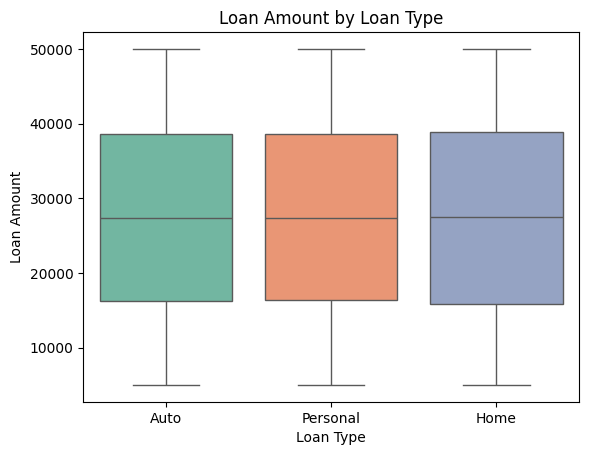

In [343]:
# Biểu đồ hộp cho số tiền vay theo loại khoản vay
sns.boxplot(data=loans, x='Loan_Type', y='Loan_Amount', palette='Set2')
plt.title("Loan Amount by Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Loan Amount")
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\2049914457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loans, x='Loan_Term', y='Interest_Inflow', palette='viridis')


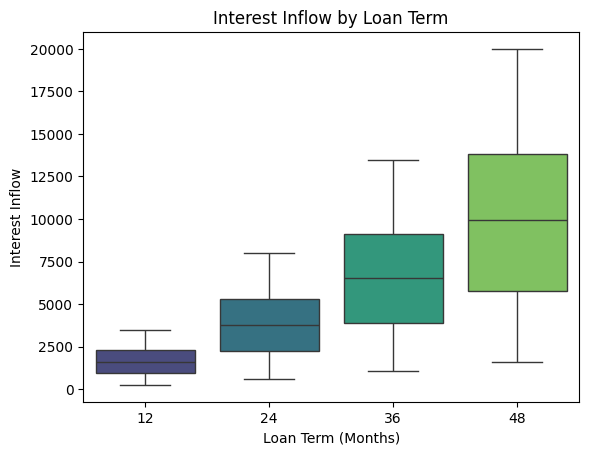

In [344]:
# Biểu đồ của dòng lãi theo kỳ hạn khoản vay
sns.boxplot(data=loans, x='Loan_Term', y='Interest_Inflow', palette='viridis')
plt.title("Interest Inflow by Loan Term")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Interest Inflow")
plt.show()

### Phân tích theo thời gian

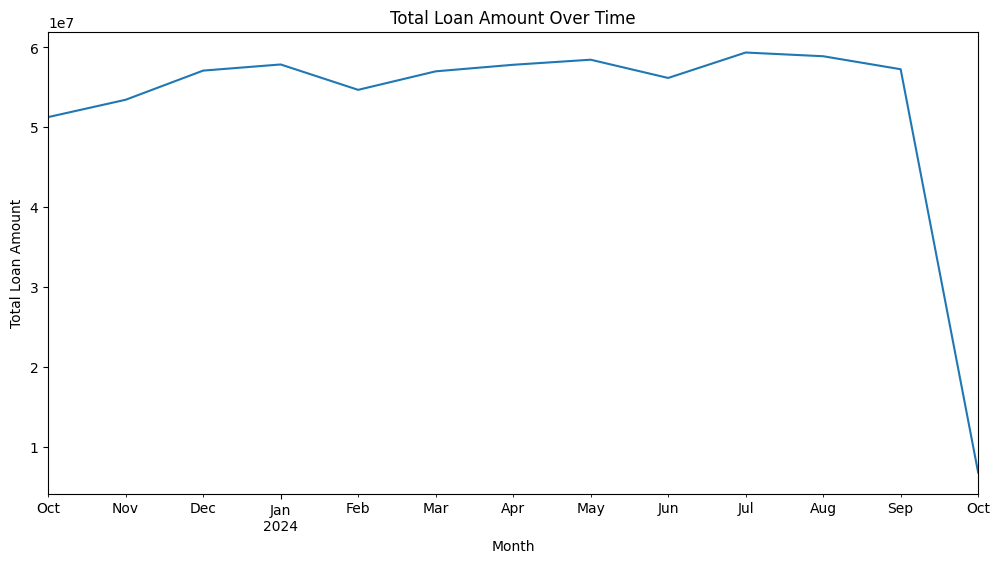

In [345]:
# Biểu đồ xu hướng để xem tổng số tiền vay thay đổi theo thời gian.
loans['Loan_Date'] = pd.to_datetime(loans['Loan_Date'])
loans.set_index('Loan_Date', inplace=True)
monthly_loan_amount = loans.resample('M')['Loan_Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_loan_amount.plot()
plt.title("Total Loan Amount Over Time")
plt.xlabel("Month")
plt.ylabel("Total Loan Amount")
plt.show()

## Operating expenses (Chi phí hoạt động):

In [346]:
exps.head()

,Expense_Date,Expense_Type,Expense_Amount,Payment_Method,Cost_Center_Department
0,2024-09-13 23:16:33.973,Maintenance,12592.51,Direct Debit,IT
1,2023-11-22 23:16:33.973,Salaries,17641.35,Credit Card,Marketing
2,2024-01-20 23:16:33.973,Maintenance,13256.21,Credit Card,Finance
3,2024-04-10 23:16:33.973,Maintenance,5049.55,Check,Operations
4,2024-09-30 23:16:33.973,Salaries,16599.39,Credit Card,Marketing


### Thông tin cơ bản

In [347]:
exps['Expense_Date'] = pd.to_datetime(exps['Expense_Date']).dt.date
exps['Expense_Date'] = pd.to_datetime(exps['Expense_Date'])
exps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Expense_Date            2000 non-null   datetime64[ns]
 1   Expense_Type            2000 non-null   object        
 2   Expense_Amount          2000 non-null   float64       
 3   Payment_Method          2000 non-null   object        
 4   Cost_Center_Department  2000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 78.3+ KB


### Thống kê tóm tắt

In [348]:
print(exps.describe(include='all'))

                      Expense_Date Expense_Type  Expense_Amount  \
count                         2000         2000     2000.000000   
unique                         NaN            5             NaN   
top                            NaN  Maintenance             NaN   
freq                           NaN          423             NaN   
mean    2024-04-05 11:15:21.600000          NaN    10619.779335   
min            2023-10-05 00:00:00          NaN     1012.050000   
25%            2024-01-06 00:00:00          NaN     5947.147500   
50%            2024-04-10 00:00:00          NaN    10774.870000   
75%            2024-07-05 00:00:00          NaN    15509.770000   
max            2024-10-04 00:00:00          NaN    19990.820000   
std                            NaN          NaN     5524.592534   

       Payment_Method Cost_Center_Department  
count            2000                   2000  
unique              3                      5  
top       Credit Card              Marketing  
freq   

### Kiểm tra giá trị thiếu

In [349]:
print(exps.isnull().sum())

Expense_Date              0
Expense_Type              0
Expense_Amount            0
Payment_Method            0
Cost_Center_Department    0
dtype: int64


### Giá trị

In [350]:
# Các loại chi phí duy nhất
print(exps['Expense_Type'].value_counts())

Expense_Type
Maintenance    423
Rent           421
Technology     391
Salaries       384
Utilities      381
Name: count, dtype: int64


In [351]:
# Các phương thức thanh toán duy nhất
print(exps['Payment_Method'].value_counts())

Payment_Method
Credit Card     693
Direct Debit    654
Check           653
Name: count, dtype: int64


### Phân phối dữ liệu

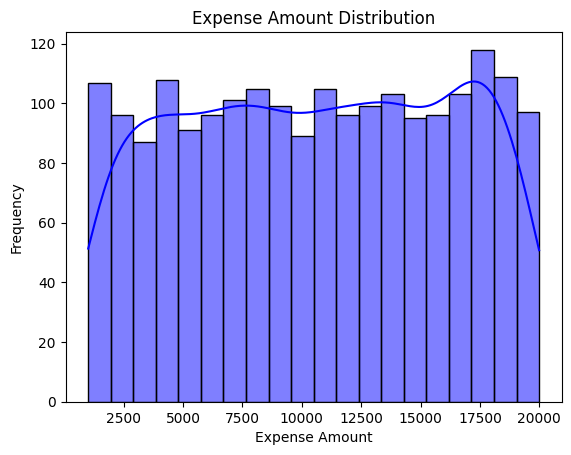

In [352]:
# Phân phối số tiền chi phí
sns.histplot(exps['Expense_Amount'], kde=True, bins=20, color='blue')
plt.title("Expense Amount Distribution")
plt.xlabel("Expense Amount")
plt.ylabel("Frequency")
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\2054988868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Expense_Type', data=exps, palette='Set2')


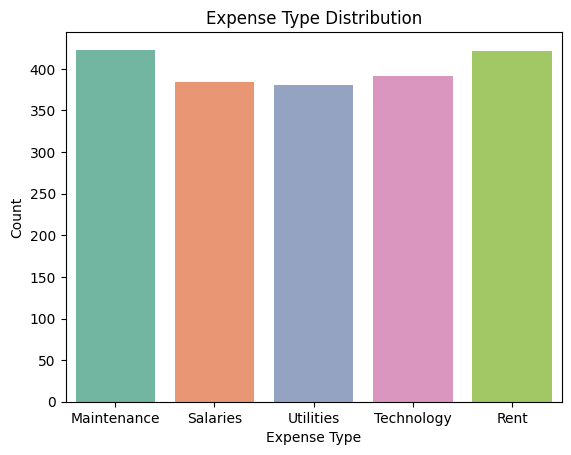

In [353]:
# Phân phối loại chi phí
sns.countplot(x='Expense_Type', data=exps, palette='Set2')
plt.title("Expense Type Distribution")
plt.xlabel("Expense Type")
plt.ylabel("Count")
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\2028558727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment_Method', data=exps, palette='Set3')


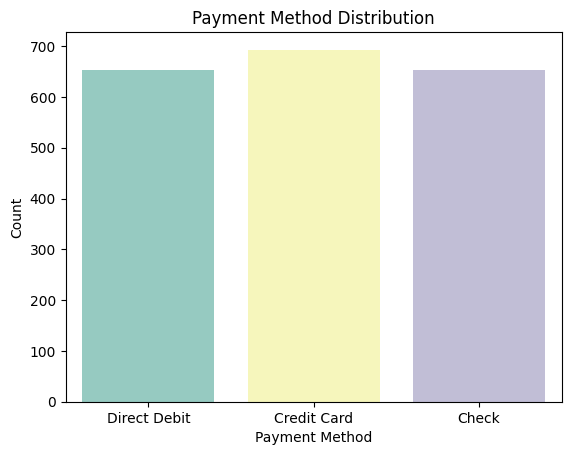

In [354]:
# Phân phối phương thức thanh toán
sns.countplot(x='Payment_Method', data=exps, palette='Set3')
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

### Biểu đồ boxplot

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\3338273751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=exps, x='Expense_Type', y='Expense_Amount', palette='Set2')


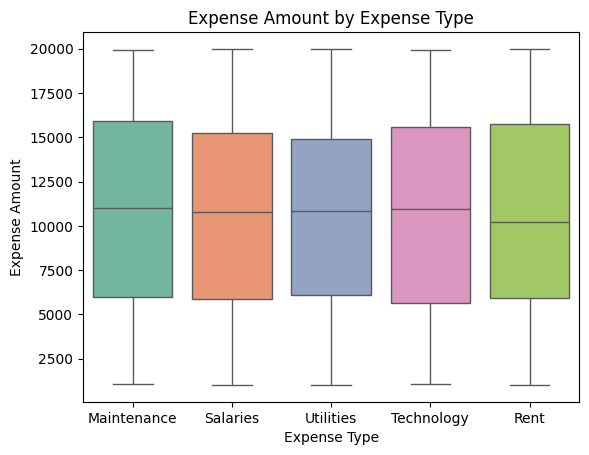

In [355]:
# Số tiền chi phí theo loại chi phí
sns.boxplot(data=exps, x='Expense_Type', y='Expense_Amount', palette='Set2')
plt.title("Expense Amount by Expense Type")
plt.xlabel("Expense Type")
plt.ylabel("Expense Amount")
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\236300843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=exps, x='Payment_Method', y='Expense_Amount', palette='Set3')


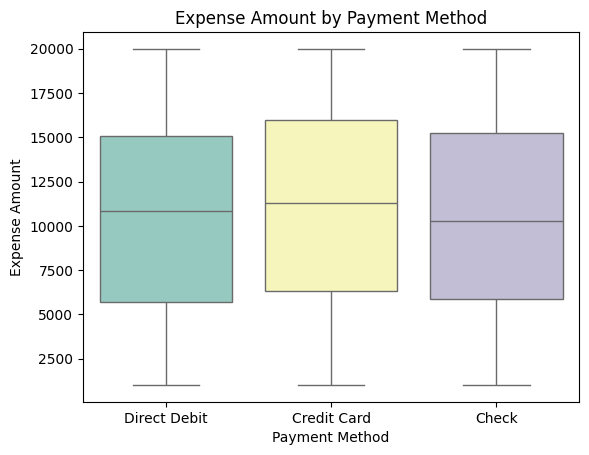

In [356]:
# Số tiền chi phí theo phương thức thanh toán
sns.boxplot(data=exps, x='Payment_Method', y='Expense_Amount', palette='Set3')
plt.title("Expense Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Expense Amount")
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\3818054813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=exps, x='Cost_Center_Department', y='Expense_Amount', palette='Set1')


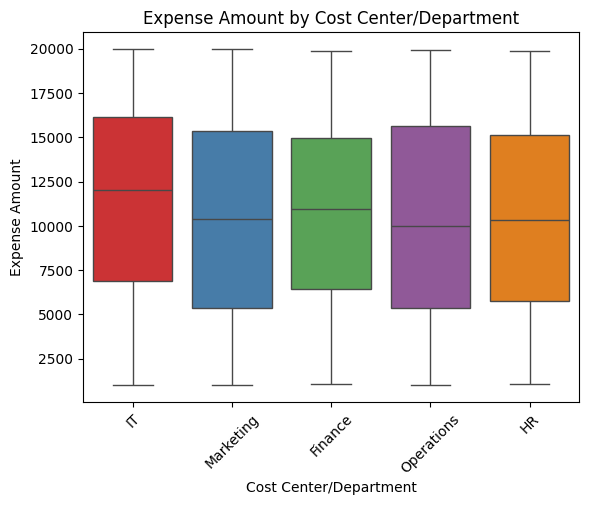

In [357]:
# Số tiền chi phí theo trung tâm chi phí/phòng ban
sns.boxplot(data=exps, x='Cost_Center_Department', y='Expense_Amount', palette='Set1')
plt.title("Expense Amount by Cost Center/Department")
plt.xlabel("Cost Center/Department")
plt.ylabel("Expense Amount")
plt.xticks(rotation=45)
plt.show()

### Biểu đồ tròn

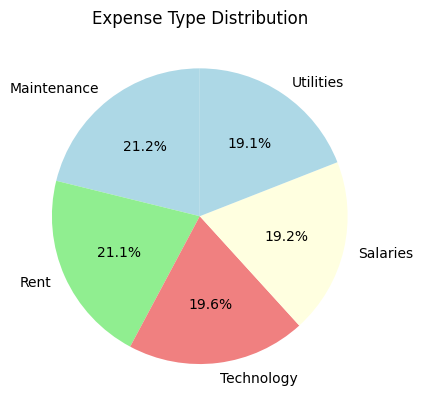

In [358]:
# Biểu đồ tròn phân phối loại chi phí
exps['Expense_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title("Expense Type Distribution")
plt.ylabel("")  # Remove the y-axis label
plt.show()

### Phân tích theo thời gian

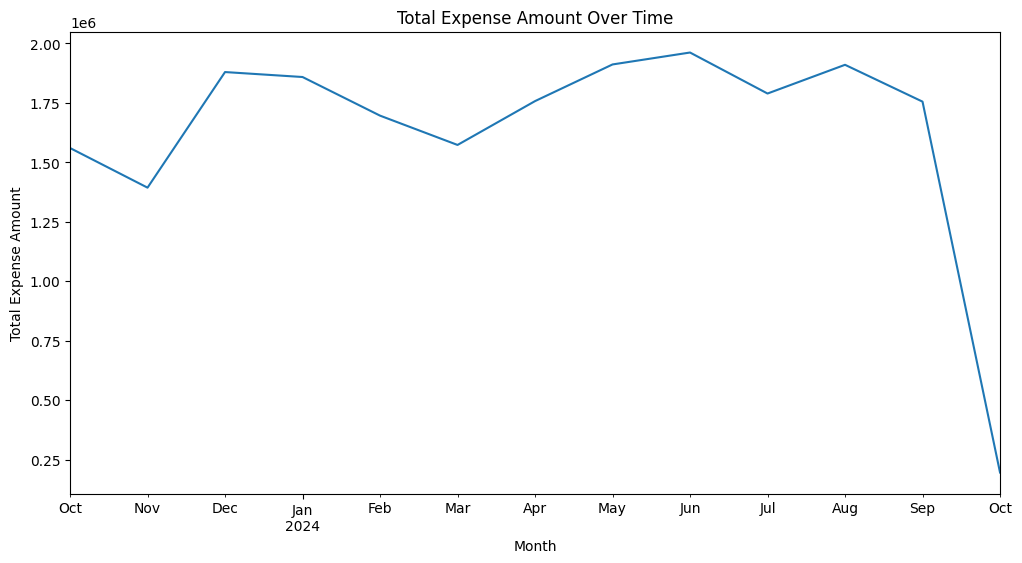

In [359]:
# Số tiền chi phí theo thời gian (Dữ liệu theo thời gian)
exps['Expense_Date'] = pd.to_datetime(exps['Expense_Date'])
exps.set_index('Expense_Date', inplace=True)
monthly_expense = exps.resample('M')['Expense_Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_expense.plot()
plt.title("Total Expense Amount Over Time")
plt.xlabel("Month")
plt.ylabel("Total Expense Amount")
plt.show()


## Withdrawals (Rút tiền):

In [360]:
withdrawals.head()

,Withdrawal_Date,Customer_ID,Withdrawal_Amount,Account_Type,Withdrawal_Channel,Branch_ATM_ID
0,2024-01-03 23:16:07.490,CUST_48466,1000.06,Current,Mobile Banking,BRANCH_54
1,2023-12-31 23:16:07.490,CUST_18567,2981.68,Current,Branch,BRANCH_58
2,2024-07-14 23:16:07.490,CUST_29247,2184.29,Current,Mobile Banking,BRANCH_72
3,2024-09-29 23:16:07.490,CUST_11561,1569.98,Current,Branch,BRANCH_50
4,2023-11-25 23:16:07.490,CUST_21802,914.00,Fixed,ATM,ATM_4


### Thông tin cơ bản

In [361]:
withdrawals['Withdrawal_Date'] = pd.to_datetime(withdrawals['Withdrawal_Date']).dt.date
withdrawals['Withdrawal_Date'] = pd.to_datetime(withdrawals['Withdrawal_Date'])
withdrawals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Withdrawal_Date     200000 non-null  datetime64[ns]
 1   Customer_ID         200000 non-null  object        
 2   Withdrawal_Amount   200000 non-null  float64       
 3   Account_Type        200000 non-null  object        
 4   Withdrawal_Channel  200000 non-null  object        
 5   Branch_ATM_ID       200000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 9.2+ MB


### Thống kê tóm tắt

In [362]:
print(withdrawals.describe(include='all'))

                      Withdrawal_Date Customer_ID  Withdrawal_Amount  \
count                          200000      200000      200000.000000   
unique                            NaN       49108                NaN   
top                               NaN    CUST_760                NaN   
freq                              NaN          16                NaN   
mean    2024-04-04 13:11:32.783999744         NaN        1523.998283   
min               2023-10-05 00:00:00         NaN          50.020000   
25%               2024-01-04 00:00:00         NaN         788.627500   
50%               2024-04-05 00:00:00         NaN        1522.790000   
75%               2024-07-05 00:00:00         NaN        2259.815000   
max               2024-10-04 00:00:00         NaN        2999.990000   
std                               NaN         NaN         851.097693   

       Account_Type Withdrawal_Channel Branch_ATM_ID  
count        200000             200000        200000  
unique            2      

### Kiểm tra giá trị thiếu

In [363]:
print(withdrawals.isnull().sum())

Withdrawal_Date       0
Customer_ID           0
Withdrawal_Amount     0
Account_Type          0
Withdrawal_Channel    0
Branch_ATM_ID         0
dtype: int64


### Giá trị

In [364]:
# Các loại tài khoản 
print(withdrawals['Account_Type'].value_counts())

Account_Type
Current    100416
Fixed       99584
Name: count, dtype: int64


In [365]:
# Các kênh rút tiền
print(withdrawals['Withdrawal_Channel'].value_counts())

Withdrawal_Channel
Branch            66715
ATM               66665
Mobile Banking    66620
Name: count, dtype: int64


In [366]:
# Các ID chi nhánh/ATM
print(withdrawals['Branch_ATM_ID'].value_counts())

Branch_ATM_ID
BRANCH_100    1081
BRANCH_42     1078
BRANCH_23     1074
BRANCH_12     1066
BRANCH_36     1062
              ... 
ATM_15         943
BRANCH_32      938
ATM_21         937
BRANCH_96      937
BRANCH_7       928
Name: count, Length: 200, dtype: int64


### Phân phối dữ liệu

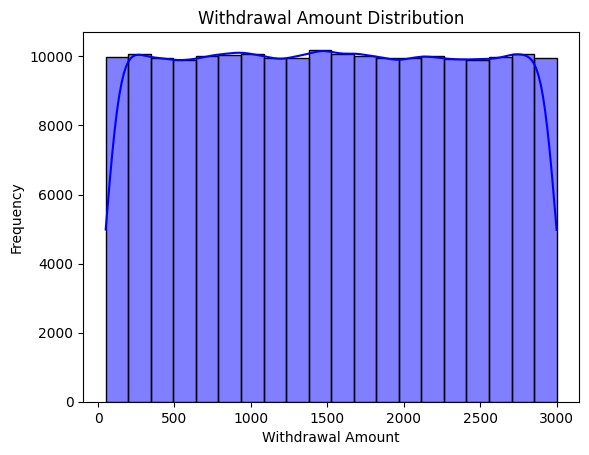

In [367]:
# Phân phối số tiền rút tiền
sns.histplot(withdrawals['Withdrawal_Amount'], kde=True, bins=20, color='blue')
plt.title("Withdrawal Amount Distribution")
plt.xlabel("Withdrawal Amount")
plt.ylabel("Frequency")
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\2972163600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Withdrawal_Channel', data=withdrawals, palette='Set2')


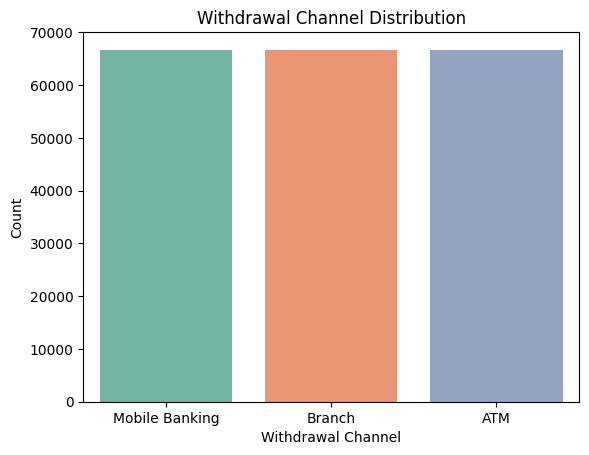

In [368]:
# Phân phối kênh rút tiền
sns.countplot(x='Withdrawal_Channel', data=withdrawals, palette='Set2')
plt.title("Withdrawal Channel Distribution")
plt.xlabel("Withdrawal Channel")
plt.ylabel("Count")
plt.show()

### Biểu đồ Boxplot

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\1537324633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=withdrawals, x='Account_Type', y='Withdrawal_Amount', palette='Set2')


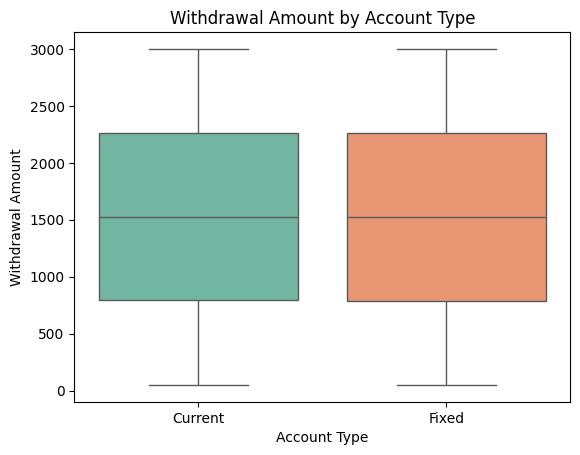

In [369]:
# Số tiền rút theo loại tài khoản
sns.boxplot(data=withdrawals, x='Account_Type', y='Withdrawal_Amount', palette='Set2')
plt.title("Withdrawal Amount by Account Type")
plt.xlabel("Account Type")
plt.ylabel("Withdrawal Amount")
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_1284\1840905795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=withdrawals, x='Withdrawal_Channel', y='Withdrawal_Amount', palette='Set3')


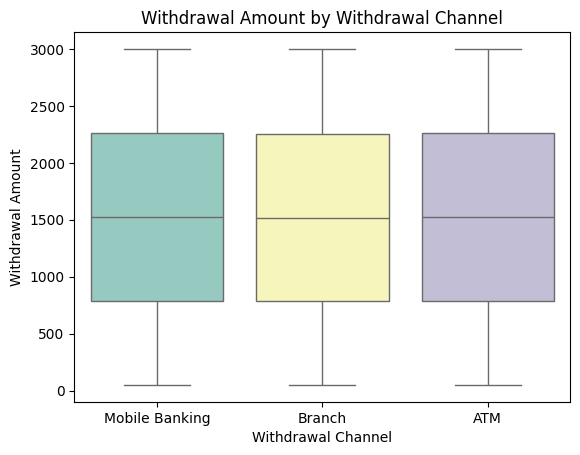

In [370]:
# Số tiền rút theo kênh rút tiền
sns.boxplot(data=withdrawals, x='Withdrawal_Channel', y='Withdrawal_Amount', palette='Set3')
plt.title("Withdrawal Amount by Withdrawal Channel")
plt.xlabel("Withdrawal Channel")
plt.ylabel("Withdrawal Amount")
plt.show()

### Số tiền rút theo thời gian (Dữ liệu theo thời gian)

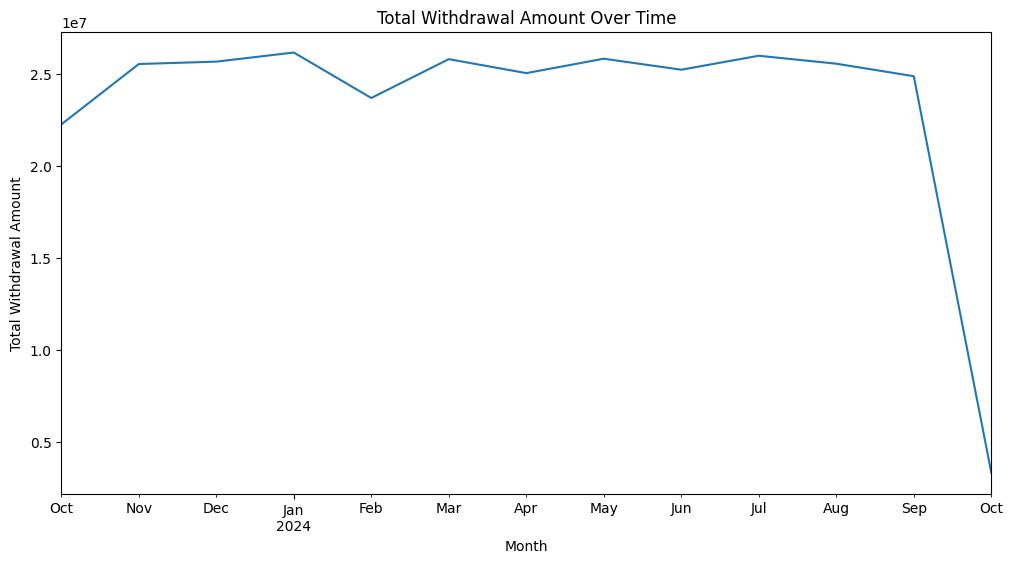

In [371]:
withdrawals['Withdrawal_Date'] = pd.to_datetime(withdrawals['Withdrawal_Date'])
withdrawals.set_index('Withdrawal_Date', inplace=True)
monthly_withdrawal = withdrawals.resample('M')['Withdrawal_Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_withdrawal.plot()
plt.title("Total Withdrawal Amount Over Time")
plt.xlabel("Month")
plt.ylabel("Total Withdrawal Amount")
plt.show()

## Cash Flow Seperation: 

Transfer In & Out:

In [372]:
transfer_in = transfers[transfers['Transfer_Type'] == 'Inbound']
transfer_out = transfers[transfers['Transfer_Type'] == 'Outbound']

In [373]:
transfer_in = transfer_in.reset_index()
loans = loans.reset_index()
inflow = pd.concat([
    bonds[['Bond_Sale_Date', 'Sale_Amount']].rename(columns={'Bond_Sale_Date': 'Date', 'Sale_Amount': 'Inflow'}), 
    deposits[['Deposit_Date', 'Deposit_Amount']].rename(columns={'Deposit_Date': 'Date', 'Deposit_Amount': 'Inflow'}),
    transfer_in[['Transfer_Date', 'Transfer_Amount']].rename(columns={'Transfer_Date': 'Date', 'Transfer_Amount': 'Inflow'}),
    loans[['Loan_Date','Interest_Inflow']].rename(columns={'Loan_Date': 'Date', 'Interest_Inflow': 'Inflow'}),
])
inflow['Date'] = pd.to_datetime(inflow['Date']).dt.date
inflow['Date'] = pd.to_datetime(inflow['Date'])
inflow.head()

,Date,Inflow
0,2024-08-15,27124.99
1,2023-11-01,23173.93
2,2024-01-29,41488.41
3,2024-06-19,17066.59
4,2024-04-25,22618.45


In [374]:
transfer_out = transfer_out.reset_index()
exps = exps.reset_index()
withdrawals = withdrawals.reset_index()
outflow = pd.concat([
    deposits[['Deposit_Date', 'Interest_Outflow']].rename(columns={'Deposit_Date': 'Date', 'Interest_Outflow': 'Outflow'}),
    transfer_out[['Transfer_Date', 'Transfer_Amount']].rename(columns={'Transfer_Date': 'Date', 'Transfer_Amount': 'Outflow'}),
    loans[['Loan_Date','Loan_Amount']].rename(columns={'Loan_Date': 'Date', 'Loan_Amount': 'Outflow'}),
    exps[['Expense_Date','Expense_Amount']].rename(columns={'Expense_Date': 'Date', 'Expense_Amount': 'Outflow'}),
    withdrawals[['Withdrawal_Date','Withdrawal_Amount']].rename(columns={'Withdrawal_Date': 'Date', 'Withdrawal_Amount': 'Outflow'}),
])
outflow['Date'] = pd.to_datetime(outflow['Date']).dt.date
outflow['Date'] = pd.to_datetime(outflow['Date'])
outflow.head()

,Date,Outflow
0,2024-05-16,1206.5602
1,2023-11-06,0.0000
2,2024-01-23,115.6040
3,2024-07-14,1394.4478
4,2023-11-13,76.8660


Cash Flow summary:

In [375]:
inflow_daily = inflow.groupby('Date').sum().reset_index()
outflow_daily = outflow.groupby('Date').sum().reset_index()
cash_flow = pd.merge(inflow_daily, outflow_daily, on = 'Date', how = 'outer', suffixes = ('_Inflow', '_Outflow')).fillna(0)
cash_flow['Net Cash Flow'] = cash_flow['Inflow'] - cash_flow['Outflow']
cash_flow.head()

,Date,Inflow,Outflow,Net Cash Flow
0,2023-10-05,1.081868e+07,3.260281e+06,7.558395e+06
1,2023-10-06,1.079753e+07,2.957768e+06,7.839761e+06
2,2023-10-07,1.010065e+07,2.928473e+06,7.172181e+06
3,2023-10-08,1.010631e+07,3.175452e+06,6.930856e+06
4,2023-10-09,1.079762e+07,3.025765e+06,7.771853e+06


### Biểu đồ dòng tiền

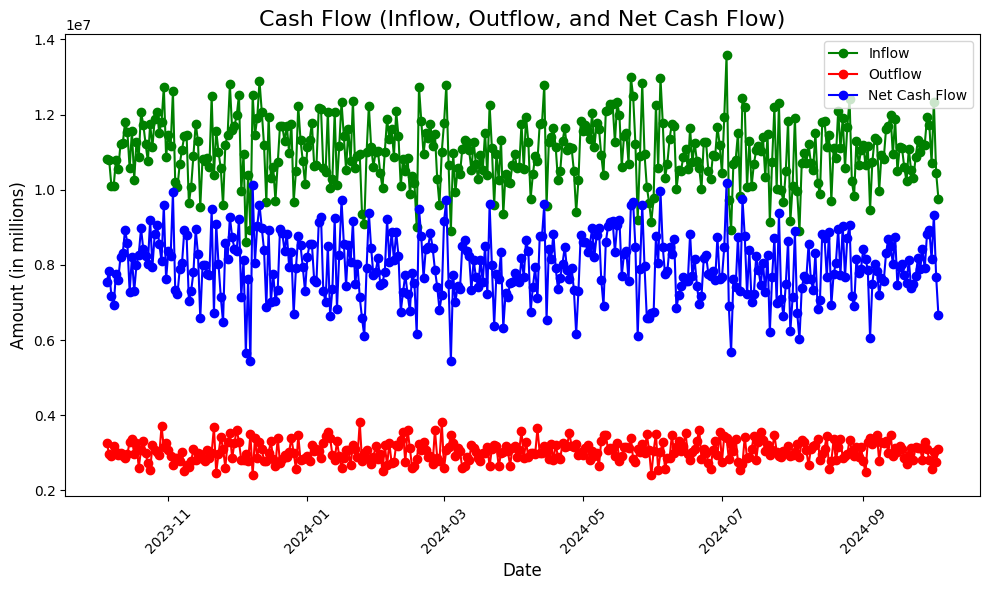

In [376]:
# hiển thị xu hướng Dòng tiền (Inflow, Outflow, và Net Cash Flow) 
# Plotting
plt.figure(figsize=(10, 6))

# Plotting Inflow, Outflow, and Net Cash Flow
plt.plot(cash_flow['Date'], cash_flow['Inflow'], label='Inflow', color='green', marker='o')
plt.plot(cash_flow['Date'], cash_flow['Outflow'], label='Outflow', color='red', marker='o')
plt.plot(cash_flow['Date'], cash_flow['Net Cash Flow'], label='Net Cash Flow', color='blue', marker='o')

# Adding labels and title
plt.title('Cash Flow (Inflow, Outflow, and Net Cash Flow)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount (in millions)', fontsize=12)
plt.legend()

# Rotating date labels for clarity
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

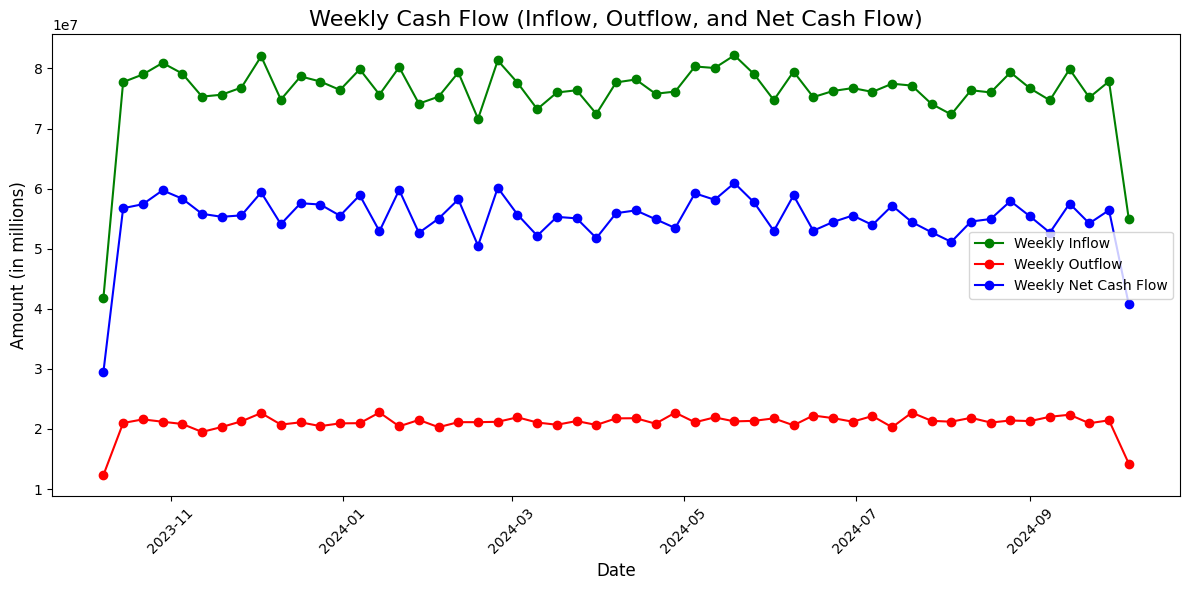

In [377]:
# Group by Week (weekly data)
weekly_cash_flow = cash_flow.resample('W', on='Date').sum()

# Plotting for Weekly Data
plt.figure(figsize=(12, 6))
plt.plot(weekly_cash_flow.index, weekly_cash_flow['Inflow'], label='Weekly Inflow', color='green', marker='o')
plt.plot(weekly_cash_flow.index, weekly_cash_flow['Outflow'], label='Weekly Outflow', color='red', marker='o')
plt.plot(weekly_cash_flow.index, weekly_cash_flow['Net Cash Flow'], label='Weekly Net Cash Flow', color='blue', marker='o')
plt.title('Weekly Cash Flow (Inflow, Outflow, and Net Cash Flow)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount (in millions)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

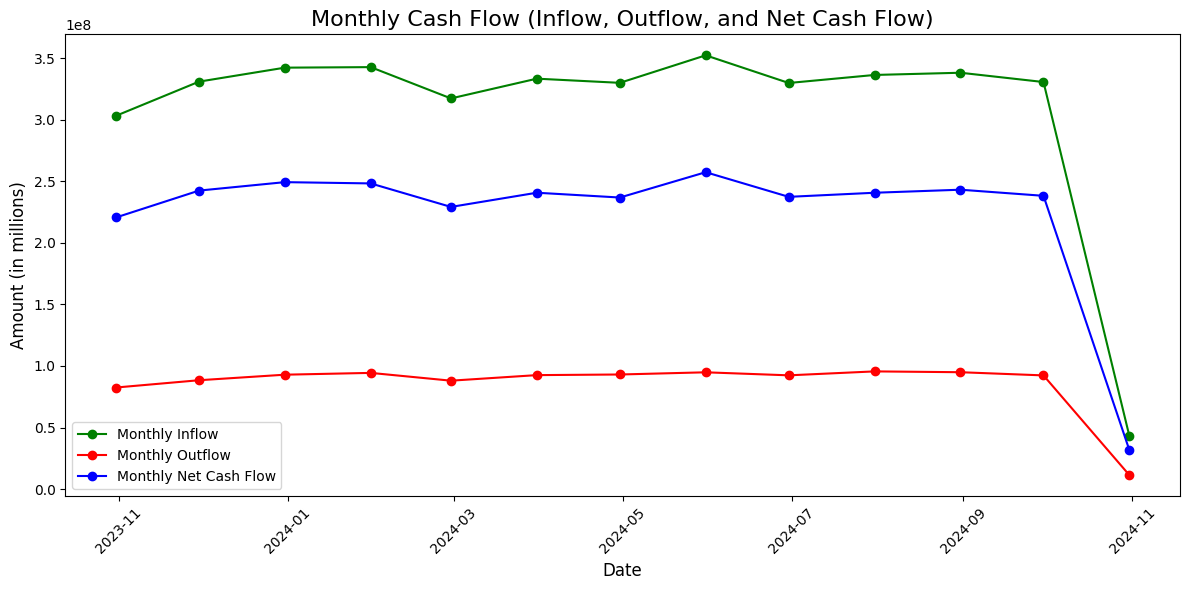

In [378]:
# Group by Month (monthly data)
monthly_cash_flow = cash_flow.resample('M', on='Date').sum()
# Plotting for Monthly Data
plt.figure(figsize=(12, 6))
plt.plot(monthly_cash_flow.index, monthly_cash_flow['Inflow'], label='Monthly Inflow', color='green', marker='o')
plt.plot(monthly_cash_flow.index, monthly_cash_flow['Outflow'], label='Monthly Outflow', color='red', marker='o')
plt.plot(monthly_cash_flow.index, monthly_cash_flow['Net Cash Flow'], label='Monthly Net Cash Flow', color='blue', marker='o')
plt.title('Monthly Cash Flow (Inflow, Outflow, and Net Cash Flow)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount (in millions)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Biểu đồ cột so sánh tổng dòng tiền

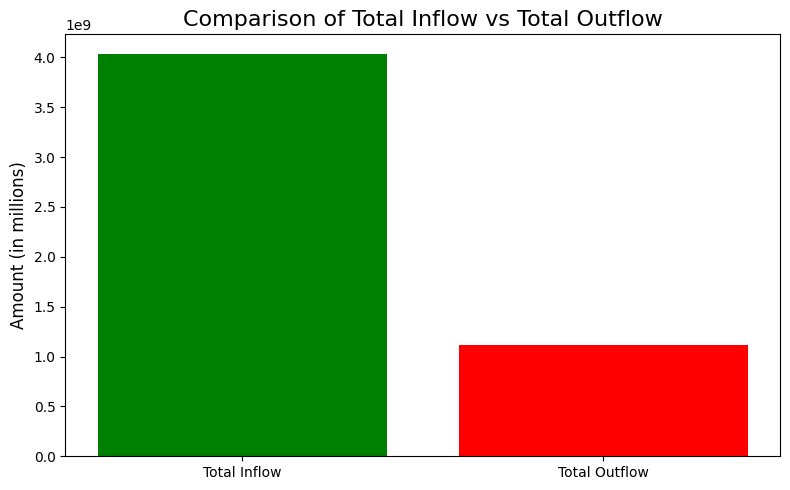

Total Inflow: 4,029,003,744.62
Total Outflow: 1,113,748,085.22


In [379]:
# Total Inflow and Outflow
total_inflow = cash_flow['Inflow'].sum()
total_outflow = cash_flow['Outflow'].sum()

# Plotting Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(['Total Inflow', 'Total Outflow'], [total_inflow, total_outflow], color=['green', 'red'])
plt.title('Comparison of Total Inflow vs Total Outflow', fontsize=16)
plt.ylabel('Amount (in millions)', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Total Inflow: {total_inflow:,.2f}")
print(f"Total Outflow: {total_outflow:,.2f}")

# Cash Flow Forecasting:

## Prophet

Chuẩn bị dữ liệu

In [380]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

cash_flow_prophet = cash_flow[['Date', 'Net Cash Flow']].rename(columns={'Date': 'ds', 'Net Cash Flow': 'y'})
cash_flow_prophet.dropna(inplace=True)  # Loại bỏ dữ liệu bị thiếu

# Chia tập dữ liệu: 80% train, 20% test
train_size = int(len(cash_flow_prophet) * 0.8)
train_data = cash_flow_prophet.iloc[:train_size]
test_data = cash_flow_prophet.iloc[train_size:]

# Kiểm tra dữ liệu
print(cash_flow_prophet.head())

          ds             y
0 2023-10-05  7.558395e+06
1 2023-10-06  7.839761e+06
2 2023-10-07  7.172181e+06
3 2023-10-08  6.930856e+06
4 2023-10-09  7.771853e+06


Huấn luyện mô hình và tạo dữ liệu dự báo

In [381]:
prophet_model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.1,  # Điều chỉnh độ nhạy với xu hướng thay đổi
    weekly_seasonality=True,
    yearly_seasonality=True
)

# Thêm mùa vụ theo tháng nếu cần
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Huấn luyện mô hình
prophet_model.fit(train_data)

# Số ngày muốn dự báo
future_days = 30

# Tạo dataframe chứa các ngày dự báo
future = prophet_model.make_future_dataframe(periods=future_days, freq = 'D') # freq='D' để đảm bảo tần suất ngày

# Dự báo dòng tiền
forecast = prophet_model.predict(future)

# Hiển thị dữ liệu dự báo
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(future_days))

23:47:30 - cmdstanpy - INFO - Chain [1] start processing
23:47:30 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
292 2024-07-23  7.301900e+06  6.210486e+06  8.288610e+06
293 2024-07-24  7.080397e+06  6.027661e+06  8.083496e+06
294 2024-07-25  6.690251e+06  5.630603e+06  7.768537e+06
295 2024-07-26  6.647710e+06  5.604339e+06  7.731558e+06
296 2024-07-27  6.471622e+06  5.375201e+06  7.529366e+06
297 2024-07-28  6.355382e+06  5.293648e+06  7.488428e+06
298 2024-07-29  6.409942e+06  5.287698e+06  7.465438e+06
299 2024-07-30  6.316437e+06  5.196138e+06  7.362443e+06
300 2024-07-31  6.368628e+06  5.290742e+06  7.479952e+06
301 2024-08-01  6.203355e+06  5.177285e+06  7.311496e+06
302 2024-08-02  6.228682e+06  5.222274e+06  7.245261e+06
303 2024-08-03  5.959732e+06  4.855431e+06  7.106513e+06
304 2024-08-04  5.680370e+06  4.567356e+06  6.713765e+06
305 2024-08-05  5.615178e+06  4.600622e+06  6.722463e+06
306 2024-08-06  5.507057e+06  4.493087e+06  6.529486e+06
307 2024-08-07  5.637384e+06  4.631703e+06  6.773428e+06
308 2024-08-08  5.599414e+06  4

Đánh giá mô hình

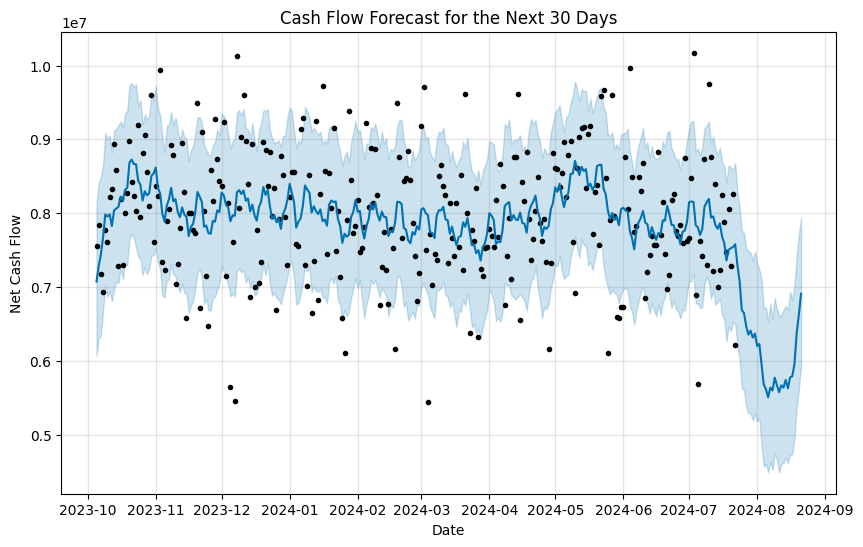

In [382]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ dự báo từ Prophet
fig, ax = plt.subplots(figsize=(10, 6))
prophet_model.plot(forecast, ax=ax)
plt.title(f'Cash Flow Forecast for the Next {future_days} Days')
plt.xlabel('Date')
plt.ylabel('Net Cash Flow')
plt.show()

## H2O

Khởi tạo H2O và chuẩn bị dữ liệu

In [383]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# Khởi tạo H2O
h2o.init()

# Chuyển đổi Date về string trong Pandas trước khi đưa vào H2O
cash_flow['Date'] = cash_flow['Date'].astype(str)

# Chuẩn bị dữ liệu: chuyển cash_flow thành H2OFrame
h2o_cash_flow = h2o.H2OFrame(cash_flow[['Date', 'Net Cash Flow']])

# Sắp xếp theo thời gian
h2o_cash_flow = h2o_cash_flow.sort(by='Date')

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% train, 20% test)
train, test = h2o_cash_flow.split_frame(ratios=[0.8], seed=1234)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,15 mins 37 secs
H2O_cluster_timezone:,Asia/Ho_Chi_Minh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,"14 days, 7 hours and 47 minutes"
H2O_cluster_name:,H2O_from_python_pc_1k9779
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.395 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Huấn luyện mô hình

In [384]:
# Xác định cột đầu vào (x) và đầu ra (y)
x = ['Date']  # Dùng Date làm đặc trưng
y = 'Net Cash Flow'

# Khởi tạo và huấn luyện H2OAutoML với max_models
aml = H2OAutoML(
    max_runtime_secs=120,  # Chạy tối đa 120 giây
    max_models=10,         # Giới hạn tối đa 10 mô hình
    seed=1234,             # Đảm bảo kết quả tái lập
    sort_metric='MAE'      # Tối ưu theo Mean Absolute Error
)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |█
23:48:20.616: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/10
# GBM base models (used / total),0/6
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


Lưu mô hình tốt nhất và tạo dự báo

In [385]:
model_path = h2o.save_model(model=aml.leader, path="./best_h2o_model", force=True)
print(f"Mô hình tốt nhất đã được lưu tại: {model_path}")

# Dự đoán trên tập test
predictions = aml.leader.predict(test)
print(predictions)

Mô hình tốt nhất đã được lưu tại: D:\tốt nghiệp\done\best_h2o_model\StackedEnsemble_AllModels_1_AutoML_4_20250410_234820
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
    predict
7.8851e+06
7.94207e+06
8.01385e+06
8.01982e+06
8.03133e+06
8.04529e+06
8.04971e+06
8.04978e+06
8.05315e+06
7.98395e+06
[71 rows x 1 column]



Đánh giá mô hình

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


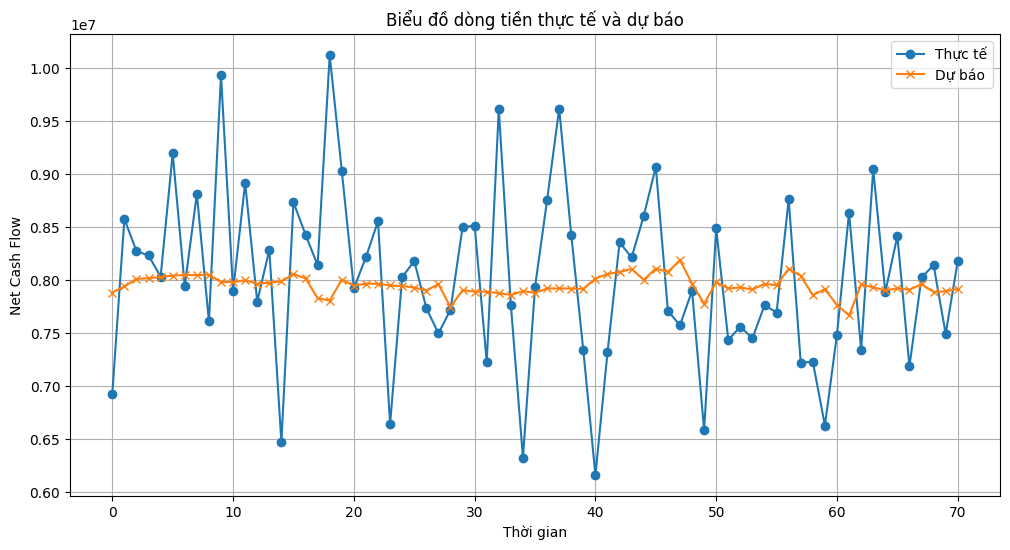

In [386]:
import matplotlib.pyplot as plt

# Chuyển đổi kết quả dự báo từ H2OFrame thành DataFrame
pred_df = predictions.as_data_frame()
test_df = test.as_data_frame()

# Thêm cột dự báo vào DataFrame test
test_df['Predicted'] = pred_df.values

# Vẽ biểu đồ so sánh dòng tiền thực tế và dự báo
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df['Net Cash Flow'], label="Thực tế", marker='o')
plt.plot(test_df.index, test_df['Predicted'], label="Dự báo", marker='x')
plt.xlabel("Thời gian")
plt.ylabel("Net Cash Flow")
plt.legend()
plt.title("Biểu đồ dòng tiền thực tế và dự báo")
plt.grid(True)
plt.show()

## Arima

Chuẩn bị dữ liệu và huấn luyện mô hình

In [387]:
import pandas as pd
from pmdarima import auto_arima

# Chuẩn bị dữ liệu: Đặt Date làm index và chỉ lấy Net Cash Flow
arima_data = cash_flow.set_index('Date')['Net Cash Flow']

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% train, 20% test)
train_size = int(len(arima_data) * 0.8)
train = arima_data[:train_size]
test = arima_data[train_size:]

# Huấn luyện mô hình auto_arima
model = auto_arima(
    train,
    seasonal=True,       # Bật mùa vụ
    m=7,                 # Chu kỳ mùa vụ 7 ngày (hàng tuần)
    stepwise=True,       # Tìm kiếm tham số nhanh
    trace=True,          # Hiển thị quá trình chọn tham số
    max_p=5, max_q=5,   # Giới hạn bậc AR và MA
    max_d=2,            # Giới hạn bậc sai phân
    max_order=10        # Giới hạn tổng bậc mô hình
)

# Dự đoán trên tập kiểm tra
forecast = model.predict(n_periods=len(test))

# Chuyển kết quả dự đoán thành DataFrame để so sánh
forecast_df = pd.DataFrame({
    'Date': test.index,
    'Actual': test.values,
    'Predicted': forecast
})

# Hiển thị kết quả
print(forecast_df.head())

# Tính MAE để đánh giá
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, forecast)
print(f"MAE của mô hình ARIMA: {mae}")

# Dự đoán tương lai (30 ngày tiếp theo)
future_forecast = model.predict(n_periods=30)

# Đảm bảo cột Date là datetime64 trước khi tạo future_dates
cash_flow['Date'] = pd.to_datetime(cash_flow['Date'])  # Chuyển đổi lại nếu cần
future_dates = pd.date_range(start=cash_flow['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame({'Date': future_dates, 'Predicted': future_forecast})
print(future_df.tail())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=8829.035, Time=4.83 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=8818.648, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=8817.558, Time=1.18 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=8817.533, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=10116.069, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=8815.539, Time=0.12 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=8817.539, Time=1.09 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=8819.533, Time=2.53 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=8817.497, Time=0.34 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=8817.461, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=8815.564, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=8819.333, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=9922.349, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[7] intercept
Total fit time: 11.013 seconds
                  Da

Đánh giá mô hình

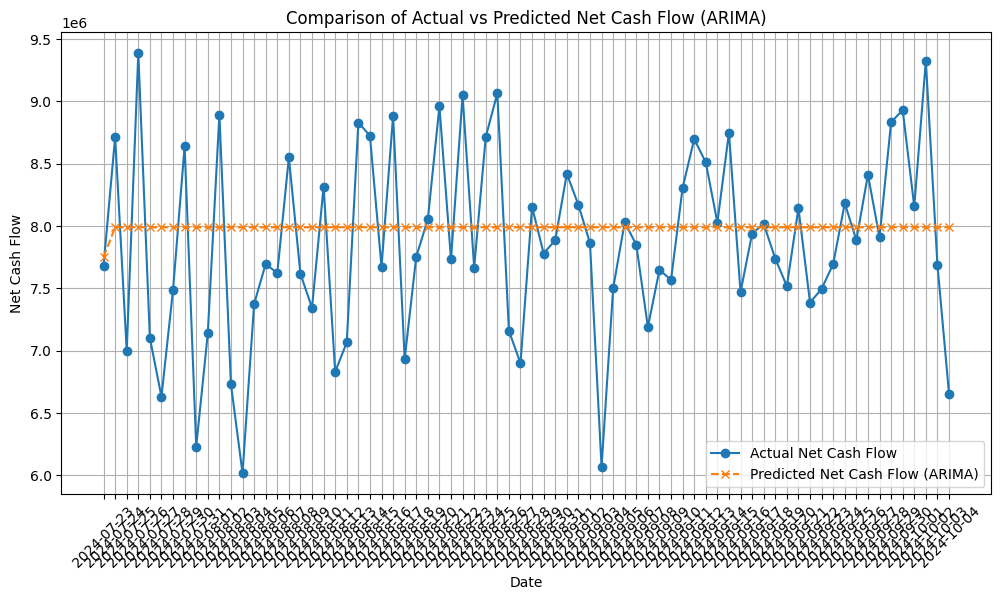

In [388]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh thực tế và dự đoán
plt.figure(figsize=(12, 6))

# Vẽ giá trị thực tế
plt.plot(forecast_df['Date'], forecast_df['Actual'], label="Actual Net Cash Flow", marker='o', linestyle='-')

# Vẽ giá trị dự đoán từ ARIMA
plt.plot(forecast_df['Date'], forecast_df['Predicted'], label="Predicted Net Cash Flow (ARIMA)", marker='x', linestyle='--')

# Thiết lập nhãn và tiêu đề
plt.xlabel("Date")
plt.ylabel("Net Cash Flow")
plt.title("Comparison of Actual vs Predicted Net Cash Flow (ARIMA)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Xoay trục x để dễ đọc ngày

# Hiển thị biểu đồ
plt.show()


# Phân tích và lựa chọn

Prophet

In [393]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import time

# Chuẩn bị dữ liệu (đổi tên và định dạng)
train_prophet = train_data.rename(columns={'Date': 'ds', 'Net Cash Flow': 'y'})
train_prophet['ds'] = pd.to_datetime(train_prophet['ds'])
test_prophet = test_data.rename(columns={'Date': 'ds', 'Net Cash Flow': 'y'})
test_prophet['ds'] = pd.to_datetime(test_prophet['ds'])

# Huấn luyện Prophet
start_time = time.time()
prophet_model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.1,
    weekly_seasonality=True,
    yearly_seasonality=True
)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.fit(train_prophet)
prophet_train_time = time.time() - start_time

# Dự báo trên tập test
future_test = test_prophet[['ds']]
forecast_test = prophet_model.predict(future_test)

# Trích xuất giá trị thực tế và dự báo
y_true = test_prophet['y'].values
y_pred = forecast_test['yhat'].values

# Tính MAE, RMSE, MAPE
prophet_mae = mean_absolute_error(y_true, y_pred)
prophet_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
prophet_mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# In kết quả
print(f"Prophet - MAE: {prophet_mae:.2f}, RMSE: {prophet_rmse:.2f}, MAPE: {prophet_mape:.2f}%, Training Time: {prophet_train_time:.2f} seconds")


23:56:19 - cmdstanpy - INFO - Chain [1] start processing
23:56:20 - cmdstanpy - INFO - Chain [1] done processing


Prophet - MAE: 1290945.16, RMSE: 1551054.30, MAPE: 16.14%, Training Time: 0.35 seconds


H2O

In [395]:
import time
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Khởi tạo h2o
h2o.init()
# Đo thời gian huấn luyện mô hình H2O AutoML
start_time = time.time()
# Chuyển đổi test_data và train_data thành H2OFrame
train_data = cash_flow[:train_size]
test_data = cash_flow[train_size:]

h2o_train = h2o.H2OFrame(train_data[['Date', 'Net Cash Flow']])
h2o_test = h2o.H2OFrame(test_data[['Date', 'Net Cash Flow']])

# Đảm bảo rằng dữ liệu được sắp xếp theo đúng thứ tự
h2o_train = h2o_train.sort(by='Date')
h2o_test = h2o_test.sort(by='Date')

# Huấn luyện mô hình H2O AutoML
aml = H2OAutoML(max_models=10, max_runtime_secs=120, seed=1234, sort_metric='MAE')
aml.train(x=['Date'], y='Net Cash Flow', training_frame=h2o_train)

# Dự báo với mô hình H2O AutoML
h2o_pred = aml.leader.predict(h2o_test).as_data_frame()['predict'].values
h2o_train_time = time.time() - start_time


# Tính MAE, RMSE và MAPE cho H2O AutoML
h2o_mae = mean_absolute_error(test_data['Net Cash Flow'], h2o_pred)
h2o_rmse = np.sqrt(mean_squared_error(test_data['Net Cash Flow'], h2o_pred))
h2o_mape = np.mean(np.abs((test_data['Net Cash Flow'] - h2o_pred) / test_data['Net Cash Flow'])) * 100

# In kết quả
print(f"H2O AutoML - MAE: {h2o_mae:.2f}, RMSE: {h2o_rmse:.2f}, MAPE: {h2o_mape:.2f}%, Training Time: {h2o_train_time:.2f} seconds")


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,25 mins 06 secs
H2O_cluster_timezone:,Asia/Ho_Chi_Minh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,"14 days, 7 hours and 56 minutes"
H2O_cluster_name:,H2O_from_python_pc_1k9779
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.389 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
23:57:48.239: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


H2O AutoML - MAE: 605111.61, RMSE: 771966.02, MAPE: 7.71%, Training Time: 108.03 seconds


Airma

In [396]:
import time
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Đo thời gian huấn luyện mô hình ARIMA
start_time = time.time()

# Huấn luyện mô hình ARIMA
arima_model = auto_arima(
    train_data['Net Cash Flow'], 
    seasonal=True, 
    m=7, 
    stepwise=True, 
    trace=True, 
    max_p=5, max_q=5, 
    max_d=2, 
    max_order=10
)

# Dự báo với ARIMA
arima_pred = arima_model.predict(n_periods=len(test_data))
arima_train_time = time.time() - start_time

# Tính MAE, RMSE, MAPE cho ARIMA
arima_mae = mean_absolute_error(test_data['Net Cash Flow'], arima_pred)
arima_rmse = np.sqrt(mean_squared_error(test_data['Net Cash Flow'], arima_pred))
arima_mape = np.mean(np.abs((test_data['Net Cash Flow'] - arima_pred) / test_data['Net Cash Flow'])) * 100

# In kết quả
print(f"ARIMA - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}, MAPE: {arima_mape:.2f}%, Training Time: {arima_train_time:.2f} seconds")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=8829.035, Time=1.27 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=8818.648, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=8817.558, Time=0.34 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=8817.533, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=10116.069, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=8815.539, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=8817.539, Time=0.45 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=8819.533, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=8817.497, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=8817.461, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=8815.564, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=8819.333, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=9922.349, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[7] intercept
Total fit time: 3.064 seconds
ARIMA - MAE: 612668.6

## kết luận
H2O là mô hình tốt nhất trong 3 mô hình